# Análise Exploratória de Dados com Python: Eleições 2022

# Tópicos

1. Introdução;
2. Exploração;
3. Processamento;
4. Visualização;
5. Divulgação

# 1. Introdução

Nesta aula, vamos entender o contexto de negócio que estamos inseridos e aprender a utilizar o Google Colab.

### 1.1 Contexto

O tribunal superior eleitoral (TSE) disponibilizou os dados brutos das urnas de votação
utilizadas durante o processo eleitoral de 2022. No site do TSE (https://resultados.tse.jus.br/oficial/app/index.html#/eleicao/resultados) encontra-se os seguintes
dados para cada urna:

Registro Digital do Voto (RDV): Registro unitário dos votos;
Boletim de Urna: Resultados agregados;
Log de Urna: Todos os eventos que ocorreram na urna.

A documentação técnica para o processamento dos arquivo também se encontra no website do
TSE (https://www.tse.jus.br/eleicoes/eleicoes-2022/documentacao-tecnica-do-software-da-urna-eletronica).

Para uma única urna (estado, cidade, zona e seção), vamos utilizar o Python para
processar o seu arquivo RDV e replicar os valores agregados do seu Boletim de
Urna para o segundo turno de votação para presidente do processo eleitoral de
2022.

### 1.2 Google Colab

Ferramenta web autogerênciada de cadernos (notebooks).

Ferramenta web

Crie uma conta Google em gmail.com;
Acesse o Google Colab através do endereço colab.research.google.com.

Autogerênciada

A Google provisiona uma máquina virtual para você;
A máquina virtual dura no máximo 12h.

Cadernos (notebooks)

Um caderno é um documento web composto por um conjunto de elementos (células) de texto e
código:
Células de texto podem ser editados com o editor da ferramenta, HTML ou Markdown;
Células de código são exclusivamente para a linguagem de programação Python.

# 2. Exploração

Nesta aula, vamos explorar, limpar e extrair os votos do arquivo RDV.

### 2.1. Upload

No site de resultados do TSE (https://resultados.tse.jus.br/oficial/app/index.html#/eleicao/resultados), selecione os dados de uma única urna, faça o download do
arquivo RDV e então, o seu upload no ambiente do Google Colab.

### 2.2. Descriptografia

Vamos utilizar o código disponibilizado pelo próprio TSE (https://www.tse.jus.br/eleicoes/eleicoes-2022/documentacao-tecnica-do-software-da-urna-eletronica) para descriptografar o arquivo
RDV em um arquivo de texto. O código foi replicado neste https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/notebooks/2022_11_29/rdv.py para facilitar a sua integração
com o Google Colab.

Faça o download do código de descriptografia.

In [ ]:
!curl -s https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/dev

Instale o pacote de criptografia utilizado pelo código.

In [35]:
!pip install asn1crypto==1.5.1

Substitua o texto NOME-DO-ARQUIVO-RDV pelo nome do arquivo RDV escolhido.

In [36]:
!python rdv.py -r resultados.tse.jus.br_oficial_ele2022_arquivo-urna_407_dados_mg_41335_0316_0029_6359564b766f334e3467377753736c476a572b644c7444777472546f786b61752d596b575551756d6342733d_o00407-4133503160029.rdv.txt > rdv.txt

2023-07-03 20:52:07,506 - INFO - Converte RDV resultados.tse.jus.br_oficial_ele2022_arquivo-urna_407_dados_mg_41335_0316_0029_6359564b766f334e3467377753736c476a572b644c7444777472546f786b61752d596b575551756d6342733d_o00407-4133503160029.rdv.txt


### 2.3. Limpeza

Na etapa de limpeza, vamos selecionar apenas as linhas do arquivo RDV referentes a votação
para presidente.

In [37]:
content = []

with open(file='rdv.txt', mode='r') as fp:
    for line in fp.readlines():
        if 'Governador' in line:
            break
        else:
            content.append(line)

In [38]:
len(content)

279

In [39]:
for line in content[0:len(content)]:
    print(line)


----------------------------------------

Presidente

  1 - nominal  - [13]

  2 - nominal  - [13]

  3 - nominal  - [13]

  4 - nominal  - [13]

  5 - nominal  - [13]

  6 - nominal  - [13]

  7 - nominal  - [13]

  8 - nominal  - [13]

  9 - nominal  - [13]

 10 - nominal  - [13]

 11 - nominal  - [13]

 12 - nominal  - [13]

 13 - nominal  - [13]

 14 - nominal  - [13]

 15 - nominal  - [13]

 16 - nominal  - [13]

 17 - nominal  - [13]

 18 - nominal  - [13]

 19 - nominal  - [13]

 20 - nominal  - [13]

 21 - nominal  - [13]

 22 - nominal  - [13]

 23 - nominal  - [13]

 24 - nominal  - [13]

 25 - nominal  - [13]

 26 - nominal  - [13]

 27 - nominal  - [13]

 28 - nominal  - [13]

 29 - nominal  - [13]

 30 - nominal  - [13]

 31 - nominal  - [13]

 32 - nominal  - [13]

 33 - nominal  - [13]

 34 - nominal  - [13]

 35 - nominal  - [13]

 36 - nominal  - [13]

 37 - nominal  - [13]

 38 - nominal  - [13]

 39 - nominal  - [13]

 40 - nominal  - [13]

 41 - nominal  - [13]

 4

### 2.4. Extração

Na etapa de extração, vamos extrair apenas os dados de votação.

A lógica é que iremos considerar apenas as linhas que contenham as palavras "nominal", "branco" ou "nulo".

In [40]:
# Vamos utilizar uma biblioteca do Python chamada Regex, que importamos como re.
# O link da documentação é o seguinte:
# https://docs.python.org/3/library/re.html

import re

''' Cria o padrão a ser procurado. Basicamente, estamos procurando tudo que esteja dentro dos
colchetes. Como os colchetes são caracteres reservados, precisamos usar a contra barra. Consultar
documentação da biblioteca.
'''
padrao = re.compile('\[(.*?)\]')
'''Inicializa uma lista vazia que irá conter os votos. A ideia é criar uma lista de dicionários
com duas chaves, onde uma das chaves é o tipo de voto (branco, nulo, 13, 22) e a outra chave é a
quantidade, que será sempre 1.'''
votos = []

for line in content:
    if 'branco' in line:
        votos.append({'voto': 'branco', 'quantidade': 1})
    if 'nulo' in line:
        votos.append({'voto': 'nulo', 'quantidade': 1})
    if 'nominal' in line:
        voto = re.findall(pattern=padrao, string=line)[0]
        votos.append({'voto': f'{voto}', 'quantidade': 1})

In [41]:
for voto in votos[0:20]:
    print(voto)

{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}


# Processamento

Nesta aula, vamos agregar os votos extraídos do arquivo RDV.

### 3.1 Pandas

Vamos utilizar o Pandas, o pacote Python mais utilizado para processamento de dados

In [42]:
import pandas as pd

### 3.2 DataFrame

A abstração base do Pandas é o DataFrame, uma estrutura de dados que representa uma tabela de duas dimensões.

In [43]:
df_votos = pd.DataFrame(votos)

In [44]:
df_votos

,voto,quantidade
0,13,1
1,13,1
2,13,1
3,13,1
4,13,1
...,...,...
270,nulo,1
271,nulo,1
272,nulo,1
273,nulo,1


In [45]:
df_votos.count(axis=1, numeric_only=False)

0      2
1      2
2      2
3      2
4      2
      ..
270    2
271    2
272    2
273    2
274    2
Length: 275, dtype: int64

In [46]:
df_votos.to_excel('votos.xlsx', header=True, index=False)

### 3.3 Agregação

Nesta operação, iremos agregar os votos com uma operação matemática de soma.

In [47]:
df_votos_agregado = df_votos.groupby('voto').agg('sum').reset_index()
df_votos_agregado

,voto,quantidade
0,13,125
1,22,137
2,branco,2
3,nulo,11


Nesta etapa vamos ordernar os dados agregados de forma decrescente, ou seja, da maior quantidade de votos para a menor.

In [48]:
df_votos_agregado = df_votos_agregado.sort_values(by='quantidade', ascending=False)
df_votos_agregado

,voto,quantidade
1,22,137
0,13,125
3,nulo,11
2,branco,2


Nesta etapa, vamos adicionar uma coluna com os valores relativos percentuais da agregação dos dados.

In [52]:
df_votos_agregado['qtd_percentual'] =  round(100 * (df_votos_agregado['quantidade'] / df_votos_agregado['quantidade'].sum()), 2)
df_votos_agregado

,voto,quantidade,qtd_percentual
1,22,137,49.82
0,13,125,45.45
3,nulo,11,4.00
2,branco,2,0.73


# 4. Visualização

Nesta aula, iremos visualizar os dados agregados.

In [ ]:
df_votos_agregado

### 4.1 Seaborn

Vamos utilizar o Seaborn, um dos pacotes Python mais utilizados para a visualização de dados.

In [ ]:
!pip install seaborn
import seaborn as sns

In [55]:
urna = "Betim_MG_0316_0029"

Na primeira visualização, iremos observar a quantidade de votos absolutos.

In [56]:
# Definindo quais colunas do DataFrame serão utilizadas para as operações. O nome passado deve ser idêntico ao nome das colunas no DataFrame.
x_column = 'voto'
y_column = 'quantidade'

In [59]:
title = f'Apuração Eleições Presidenciais - Segundo turno de 2022 - Urna {urna}'
label_x = 'Voto'
label_y = 'Quantidade'

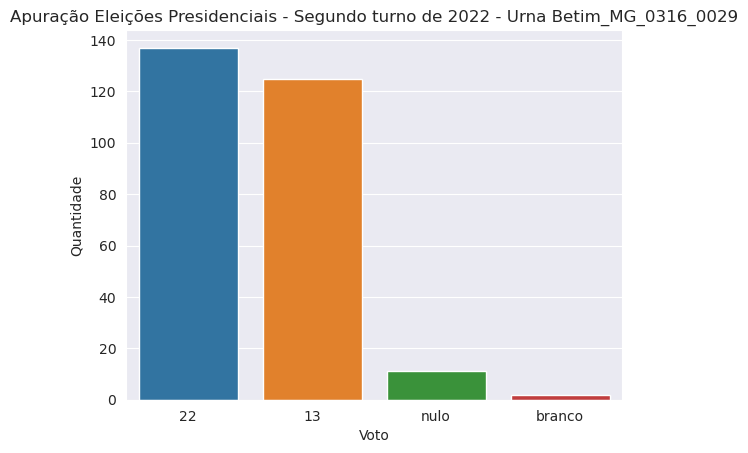

In [61]:
with sns.axes_style('darkgrid'):
    chart = sns.barplot(df_votos_agregado, x=x_column, y=y_column)
    chart.set(title=title, xlabel=label_x, ylabel=label_y)

In [62]:
x_column = 'voto'
y_column = 'qtd_percentual'

In [63]:
title = f'Apuração Eleições Presidenciais - Segundo turno de 2022 - Urna {urna}'
x_label = 'Voto'
y_label = 'Quantidade Percentual'

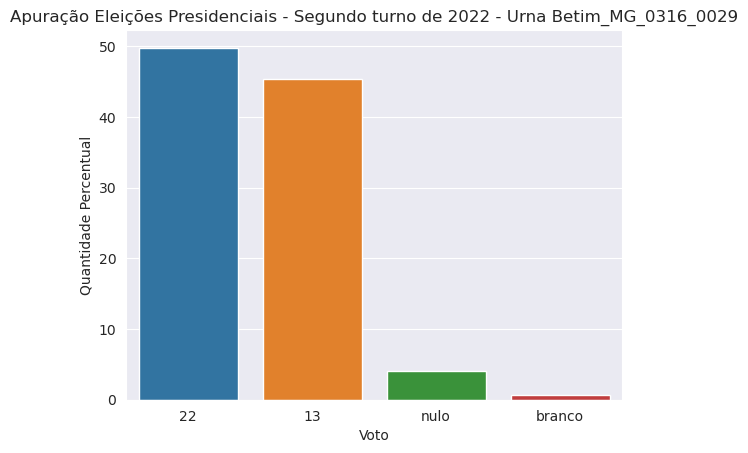

In [64]:
with sns.axes_style('darkgrid'):
    chart = sns.barplot(df_votos_agregado, x=x_column, y=y_column)
    chart.set(title=title, xlabel=x_label, ylabel=y_label)